In [1]:
import os

os.listdir()

['.ipynb_checkpoints', 'justolympics.csv', 'Salaries.csv', 'Untitled.ipynb']

In [2]:
#Import Libraries we need
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#Set styling of the graph
sns.set_style('whitegrid') #Used to plot the background and style
sns.set(rc={'figure.figsize':(12,12)}) #USe to set the figuresize

In [4]:
sal = pd.read_csv('salaries.csv')
sal.head(3)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN


In [8]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148650 non-null float64
OtherPay            148650 non-null float64
Benefits            112491 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              0 non-null float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


1. What is the Average BasePay?

In [7]:
sal['BasePay'].mean()

66325.44884050643

In [15]:
def string_converter(x):
    return float(x)
#Run all rows through 
sal['BasePay'] = sal.BasePay.apply(string_converter)
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148650 non-null float64
OtherPay            148650 non-null float64
Benefits            112491 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              0 non-null float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


2. What is the highest amount of OvertimePay in the dataset

In [18]:
sal['OvertimePay'].max()

245131.88

3. What Job title of 'JOSEPH DRISCOLL'?

In [24]:
# sal['EmployeeName'] == 'JOSEPH DRISCOLL'
myarr = np.array([1,2,3,4,5,6,7])
myarr <5
myarr[myarr < 5]

array([1, 2, 3, 4])

In [30]:
sal.JobTitle[sal.EmployeeName == 'JOSEPH DRISCOLL']

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

In [31]:
sal.TotalPay[sal.EmployeeName == 'JOSEPH DRISCOLL']

24    270324.91
Name: TotalPay, dtype: float64

3. The name of the most paid person

In [33]:
sal.EmployeeName[sal.TotalPayBenefits == sal.TotalPayBenefits.max()]

0    NATHANIEL FORD
Name: EmployeeName, dtype: object

4. Lowest paid person 

In [34]:
sal[['TotalPay', 'EmployeeName']][sal.TotalPayBenefits == sal.TotalPayBenefits.min()]]

SyntaxError: invalid syntax (<ipython-input-34-0409005fea6f>, line 1)

5. Average mean Basepay of all employees per year 2011 -2014?

In [37]:
sal.groupby('Year').mean()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Notes,Status
Year,,,,,,,,,
2011,18080.0,63595.956517,4531.065429,3617.081926,NaN,71744.103871,71744.103871,NaN,NaN
2012,54542.5,65436.406857,5023.417824,3653.437583,26439.966967,74113.262265,100553.229232,NaN,NaN
2013,91728.5,69630.030216,5281.641980,3819.969007,23829.076572,77611.443142,101440.519714,NaN,NaN
2014,129593.0,66564.421924,5401.993737,3505.421251,24789.601756,75463.918140,100250.918884,NaN,NaN


6. How many unique job titles are there?

In [38]:
len(sal.JobTitle.unique())

2159

7. Top 5 most common jobs

In [40]:
sal.JobTitle.value_counts().head(5)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

8. How many job titles were represented by only one person in 2013?
 e.g Job titles with only one occurence in 2013

In [51]:
sum(sal[sal.Year == 2013].JobTitle.value_counts() == 1)

202

9. How many people have the word 'Chief' in their job title?

In [55]:
sal[sal.JobTitle.str.contains('Chief')].count()

Id                  423
EmployeeName        423
JobTitle            423
BasePay             420
OvertimePay         423
OtherPay            423
Benefits            423
TotalPay            423
TotalPayBenefits    423
Year                423
Notes                 0
Agency              423
Status                0
dtype: int64

10. Is there correlation between length of job Title and Salary

In [57]:
def find_length(x):
    return len(str(x))

sal['JobTitleLength'] = sal.JobTitle.apply(find_length)
sal.JobTitleLength.head(2)

0    46
1    31
Name: JobTitleLength, dtype: int64

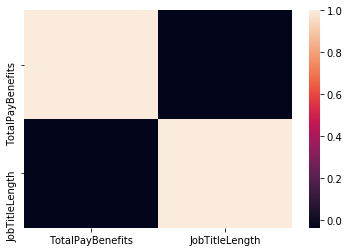

In [59]:
sns.heatmap(sal[['TotalPayBenefits', 'JobTitleLength']].corr())